# Benchmark analysis & plotting

This notebook describes the statistical analysis and plotting of the benchmark analysis of my master thesis.

In [202]:
# Importing packages and data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import lines

import pandas as pd
import numpy as np
import os
from os.path import join as opj
import seaborn as sns

colors = sns.color_palette()
home = os.path.expanduser('~')
resultsdir = opj(home, 'Dropbox', 'ResMas_UvA', 'Thesis', 'Git', 'Analysis_results')
filepath = opj(resultsdir, 'benchmark_results.csv')

# Load in data + clean data
data = pd.read_csv(filepath, sep='\t', skiprows=21)
data = data.dropna(how='any')
data['fs_count'] = data['fs_count'].astype(float)
data['sub_name'] = np.arange(len(data.index)) # random assignment of subject no.


## Statistical analysis
Statistical analysis performed using scipy/statsmodels package

In [170]:
from scipy.stats import ttest_1samp as ttest
t, p = ttest(data['score'], 0.33)

print 'A one-sample t-test of an observed accuracy of %.3f to chance-level accuracy (%.3f), gives a t-value of %.3f (df = %i) with a corresponding p-value of %.3f.' % \
(np.mean(data['score']), 0.333, t, len(data['score']), p)

A one-sample t-test of an observed accuracy of 0.599 to chance-level accuracy (0.333), gives a t-value of 7.178 (df = 12) with a corresponding p-value of 0.000.


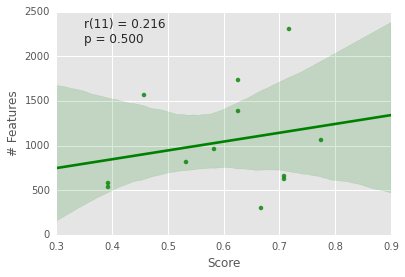

In [191]:
from scipy.stats import linregress as linregress
out = linregress(data['score'], data['fs_count'])
slope, intercept, r, p, stderr = out

ax = sns.regplot(x='score', y='fs_count', data=data, color='g', fit_reg=True)
ax.set_ylabel('# Features')
ax.set_xlabel('Score')
ax.text(0.35, 2150, 'r(%i) = %.3f\np = %.3f' % (len(data['score']) - 1, r, p), size=12)

## Plotting

Here, some plots are generated to visualize the classification scores per subject

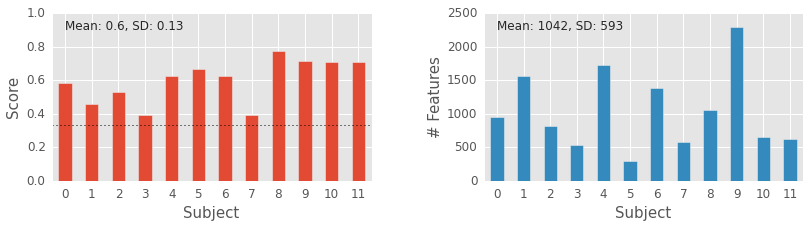

In [207]:
mean_score = np.round(data['score'].mean(), 2)
std_score = np.round(data['score'].std(), 2)
mean_feat = np.round(data['fs_count'].mean(), 0)
std_feat = np.round(data['fs_count'].std(), 0)

fig, axes = plt.subplots(1,2)

data.plot(kind='bar', x='sub_name', y='score', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(12, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)
        
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %.0f, SD: %.0f' % (mean_feat, std_feat), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'benchmark_plot.png'), dpi=600, bbox_inches='tight')